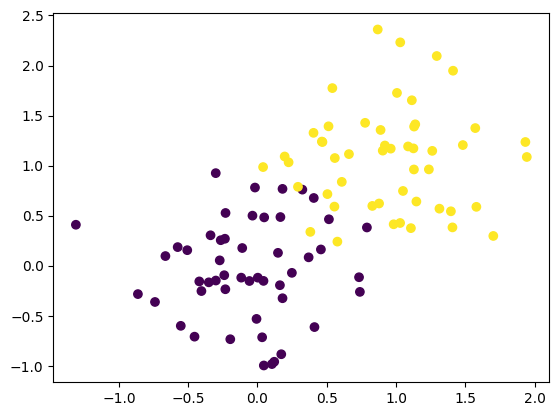

          X         Y  class
0  0.248357 -0.069132    0.0
1  0.323844  0.761515    0.0
2 -0.117077 -0.117068    0.0
3  0.789606  0.383717    0.0
4 -0.234737  0.271280    0.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Generate the data
n_samples = 100

# Class 0
X0 = np.random.normal(loc=0, scale=0.5, size=(n_samples // 2, 2))
y0 = np.zeros((n_samples // 2, 1))

# Class 1
X1 = np.random.normal(loc=1, scale=0.5, size=(n_samples // 2, 2))
y1 = np.ones((n_samples // 2, 1))

# Concatenate the data
X = np.vstack((X0, X1))
y = np.vstack((y0, y1))

# Create a DataFrame
df = pd.DataFrame(np.hstack((X, y)), columns=['X', 'Y', 'class'])

# Plot the data
plt.scatter(df['X'], df['Y'], c=df['class'])
plt.show()

# Display the first few rows
print(df.head())

In [2]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [3]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

C:\Users\princ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.6094 - loss: 0.7233 - val_accuracy: 0.0000e+00 - val_loss: 0.9909
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6172 - loss: 0.6952 - val_accuracy: 0.0000e+00 - val_loss: 0.9423
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6484 - loss: 0.6637 - val_accuracy: 0.0000e+00 - val_loss: 0.8978
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6211 - loss: 0.6538 - val_accuracy: 0.0000e+00 - val_loss: 0.8578
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5938 - loss: 0.6473 - val_accuracy: 0.0000e+00 - val_loss: 0.8217
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6211 - loss: 0.6226 - val_accuracy: 0.0000e+00 - val_loss: 0.7946
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6367 - loss: 0.5985 - val_accuracy: 0.0000e+00 - val_loss: 0.7727
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6227 - loss: 0.5840 - val_

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 738us/step


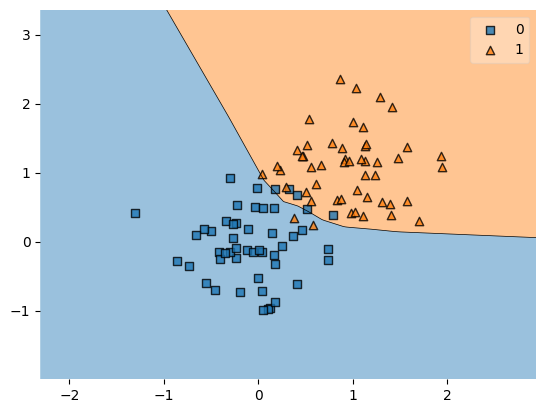

In [7]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),model)
plt.show()

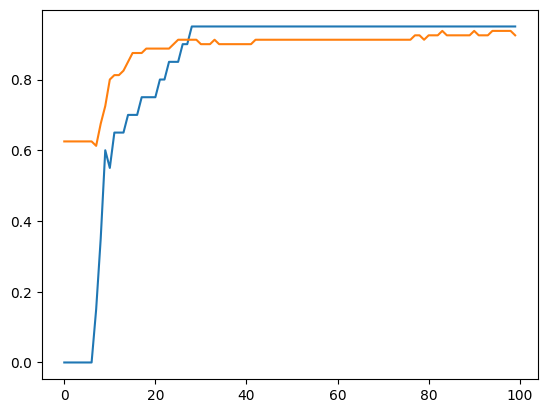

In [9]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.show()